### Model Training Time Benchmark
Sheun Aluko CS230 

#### Dependency Imports

In [3]:
# conventional imports 
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Activation
import matplotlib.pyplot as plt
keras = tf.keras

#custom imports 
import util as u
import ml_helpers as ml 
import reloader  


# The reloader object allows reloading of source code after modifications are made 
r = reloader.Reloader(["util","ml_helpers"]) 
r.reload() 

# config 
plt.rcParams["figure.figsize"] = (20,10)
u.reload() 

Reloaded: util
Reloaded: ml_helpers


#### Load Data

In [2]:
data_fraction = 0.05
data = u.data_load(f=data_fraction)
print("Train Size: {}\nVal Size: {}".format(str(len(data[0])),str(len(data[2]))) ) 


Loading data for term index: 8
Fraction of data that will be loaded=0.05

Loading train set
Removed 6 lesion(s) of 1995
Done

Loading val set
Removed 0 lesion(s) of 179
Done

Loading test set
Removed 1 lesion(s) of 203
Done

Train Size: 99
Val Size: 8
Train Size: 99
Val Size: 8


In [4]:
v = ml.get_baseline_vgg_model_no_pool() 
v.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Freezing layer: block1_conv1
Freezing layer: block1_conv2
Freezing layer: block2_conv1
Freezing layer: block2_conv2
Dropping layer: block4_pool
Dropping layer: block5_pool
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
input_1 (InputLayer)         multiple                  0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 512, 512, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 512, 512, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 256, 256, 64)      0         
______

#### Hyperparamater Search (Batch Size)


Using provided data

Freezing layer: block1_conv1
Freezing layer: block1_conv2
Freezing layer: block2_conv1
Freezing layer: block2_conv2
Dropping layer: block4_pool
Dropping layer: block5_pool
Creating multi GPU model

Runing model:: vBVNP_t99_e1_b2_lr0.001

Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    

Fitting multi_GPU=[True] model with bs=2,epochs=1,lr=0.001

Train 

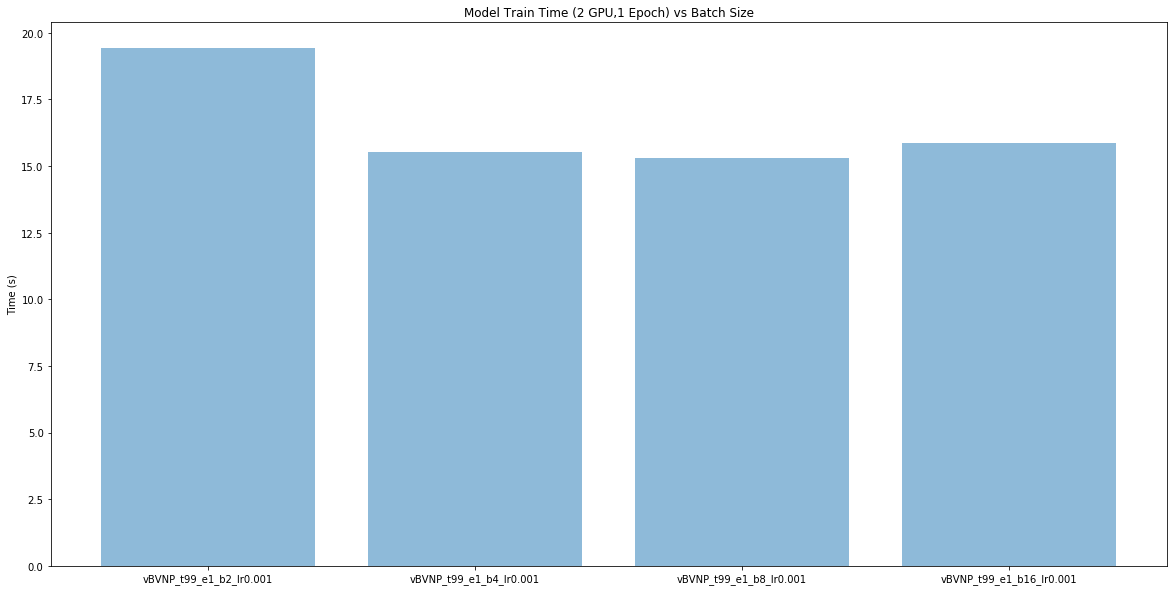

In [5]:
num_epochs = 1 
model_id = 'baseline_vgg_no_pool'

results = [] 
for b in  [2,4,8,16]  : 
    result = ml.run_model(data=data,batch_size=b,num_epochs=num_epochs,model_id=model_id,save=False,multi_gpu=True)
    results.append(result) 

p =  ml.benchmark_bar(results, "Model Train Time (2 GPU,1 Epoch) vs Batch Size") 


In [ ]:
p =  ml.benchmark_bar(results, "Model Train Time (1 GPU,1 Epoch) vs Batch Size") 

In [ ]:
p.savefig("models/figures/hyperparam_vgg.png")

#### Hyperparamater Search (Learning Rate) 

In [ ]:
#no dropout (NEXT STEP --- TRAIN RAW VGG !!! )

In [ ]:
#vgg_model = keras.applications.VGG16(weights='imagenet', include_top=False, input_shape = (512,512,3) )
#vgg_model.summary()

In [ ]:
batch_size = 2
num_epochs = 50
learning_rates = [0.005,0.001,0.0004,0.0001]
model_id = 'baseline_vgg_block4tr'
#learning_rates = [0.0003]
#[ math.pow(10,-x) for x in np.arange(1,4,0.5)]
#print("Learning rates:: {}".format(str(learning_rates)))
results = [] 

for lr in learning_rates : 
    # RUN THE MODEL 
    result = ml.run_model(data=data,
                          batch_size=batch_size,
                          num_epochs=num_epochs,
                          learning_rate=lr,
                          #dropout=0.1,
                          model_id=model_id)
    results.append(result)
    ml.train_curve(result['train_info'].history,result['name']) 
    np.save("models/{}_history".format(result['name']), result['train_info'].history)

In [ ]:
#with dropout

In [ ]:
batch_size = 2
num_epochs = 50
learning_rates = [0.005,0.001,0.0004,0.0001]
model_id = 'baseline_vgg_block4tr'
#learning_rates = [0.0003]
#[ math.pow(10,-x) for x in np.arange(1,4,0.5)]
#print("Learning rates:: {}".format(str(learning_rates)))
results = [] 

for lr in learning_rates : 
    # RUN THE MODEL 
    result = ml.run_model(data=data,
                          batch_size=batch_size,
                          num_epochs=num_epochs,
                          learning_rate=lr,
                          dropout=0.1,
                          model_id=model_id)
    results.append(result)
    ml.train_curve(result['train_info'].history,result['name']) 
    np.save("models/{}_history".format(result['name']), result['train_info'].history)

In [ ]:
batch_size = 2
num_epochs = 50
learning_rates = [0.005,0.001,0.0004,0.0001]
model_id = 'baseline'
#learning_rates = [0.0003]
#[ math.pow(10,-x) for x in np.arange(1,4,0.5)]
#print("Learning rates:: {}".format(str(learning_rates)))
results3 = [] 

for lr in learning_rates : 
    # RUN THE MODEL 
    result = ml.run_model(data=data,
                          batch_size=batch_size,
                          num_epochs=num_epochs,
                          learning_rate=lr,
                          #dropout=0.1,
                          model_id=model_id)
    results3.append(result)
    ml.train_curve(result['train_info'].history,result['name']) 
    np.save("models/{}_history".format(result['name']), result['train_info'].history)

In [ ]:
#4
for result in results : 
        print(result['name'])
        ml.train_curve(result['train_info'].history)